# <center>Общее представление о дереве решений</center>

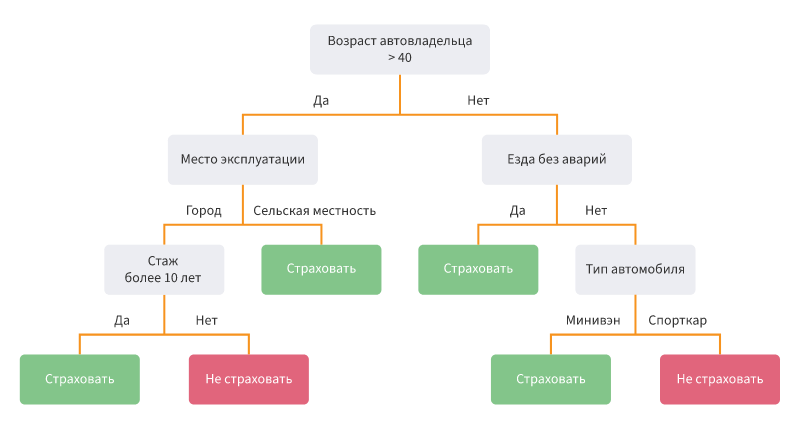

Успешнее всего деревья применяют в следующих областях:

* **Банковское дело**. Оценка кредитоспособности клиентов банка при выдаче кредитов.
* **Промышленность**. Контроль качества продукции (обнаружение дефектов в готовых товарах), испытания без нарушений (например, проверка качества сварки) и т. п.
* **Медицина**. Диагностика заболеваний разной сложности.
* **Молекулярная биология**. Анализ строения аминокислот.
* **Торговля**. Классификация клиентов и товара

Формально структура дерева решений — это **связный ациклический граф**.
>**Граф** — это абстрактная топологическая модель, которая состоит из вершин и соединяющих их рёбер.
>
>**Связный граф** — это граф, в котором между любой парой существует направленная связь.
>
>**Ациклический граф** — это граф, в котором отсутствуют циклы, то есть в графе не существует такого пути, по которому можно вернуться в начальную вершину.

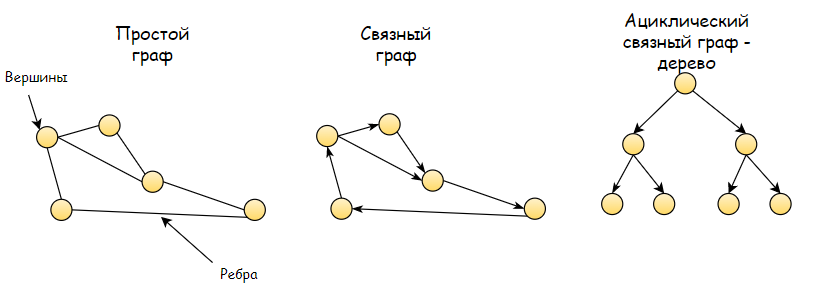

В дереве решений можно выделить **три типа вершин**:

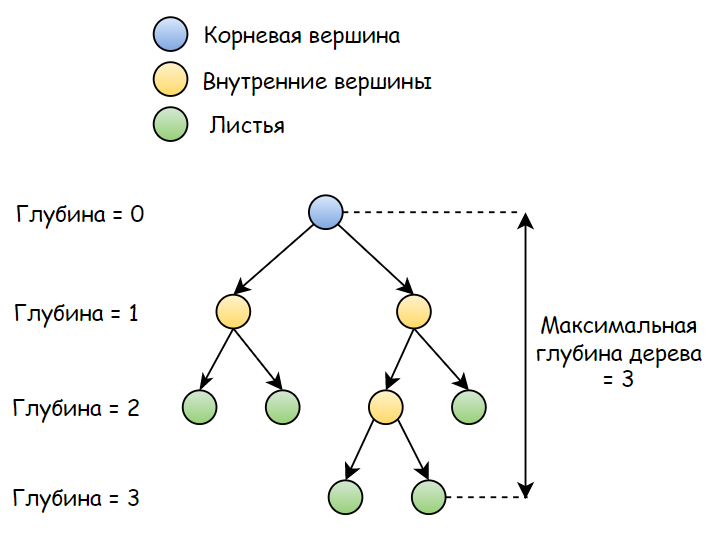

* **Корневая вершина (root node)** — то, откуда всё начинается. Это первый и самый главный вопрос, который дерево задаёт объекту. В примере со страхованием это был вопрос «Возраст автовладельца > 40».
* **Внутренние вершины (intermediate nodes)** — это дополнительные уточняющие вопросы, которые дерево задаёт объекту. 
* **Листья (leafs)** — конечные вершины дерева. Это вершины, в которых содержится конечный «ответ» — класс объекта.
>Максимально возможная длина от корня до самых дальних листьев (не включая корневую) называется **максимальной глубиной дерева (max depth)**.

>Логический критерий, который находится в каждой вершине, называется **предикатом**, или **решающим правилом**.

На самом деле все предикаты — это просто взятие порога по значению какого-то признака. Формально это записывается следующим образом:
$$ B_v (x, t) = I[x_j \leq t] $$
Предикат вершины дерева $B_v$  (где $v$ — это номер вершины) равен 1 («Да»), если признак $x_j$ меньше либо равен значению $t$, и 0 («Нет») — в противном случае. Функция $I$ с квадратными скобками — это уже знакомая нам индикаторная функция: она равна 1, если условие внутри скобок выполняется, и 0 — в противном случае.

В зависимости от реализации предикат может быть с условием $\leq$ или $\geq$. В реализации sklearn используется условие $\leq$.

Если результат предиката равен 1, то мы переходим по левой ветви дерева к следующему узлу, в противном случае — по правой ветви дерева к следующему узлу.

Каждый новый вопрос дерева решений при его обучении разбивает пространство признаков на две части: в первую часть отправляются наблюдения, для которых предикат истинен, а во вторую — для которых он ложен.

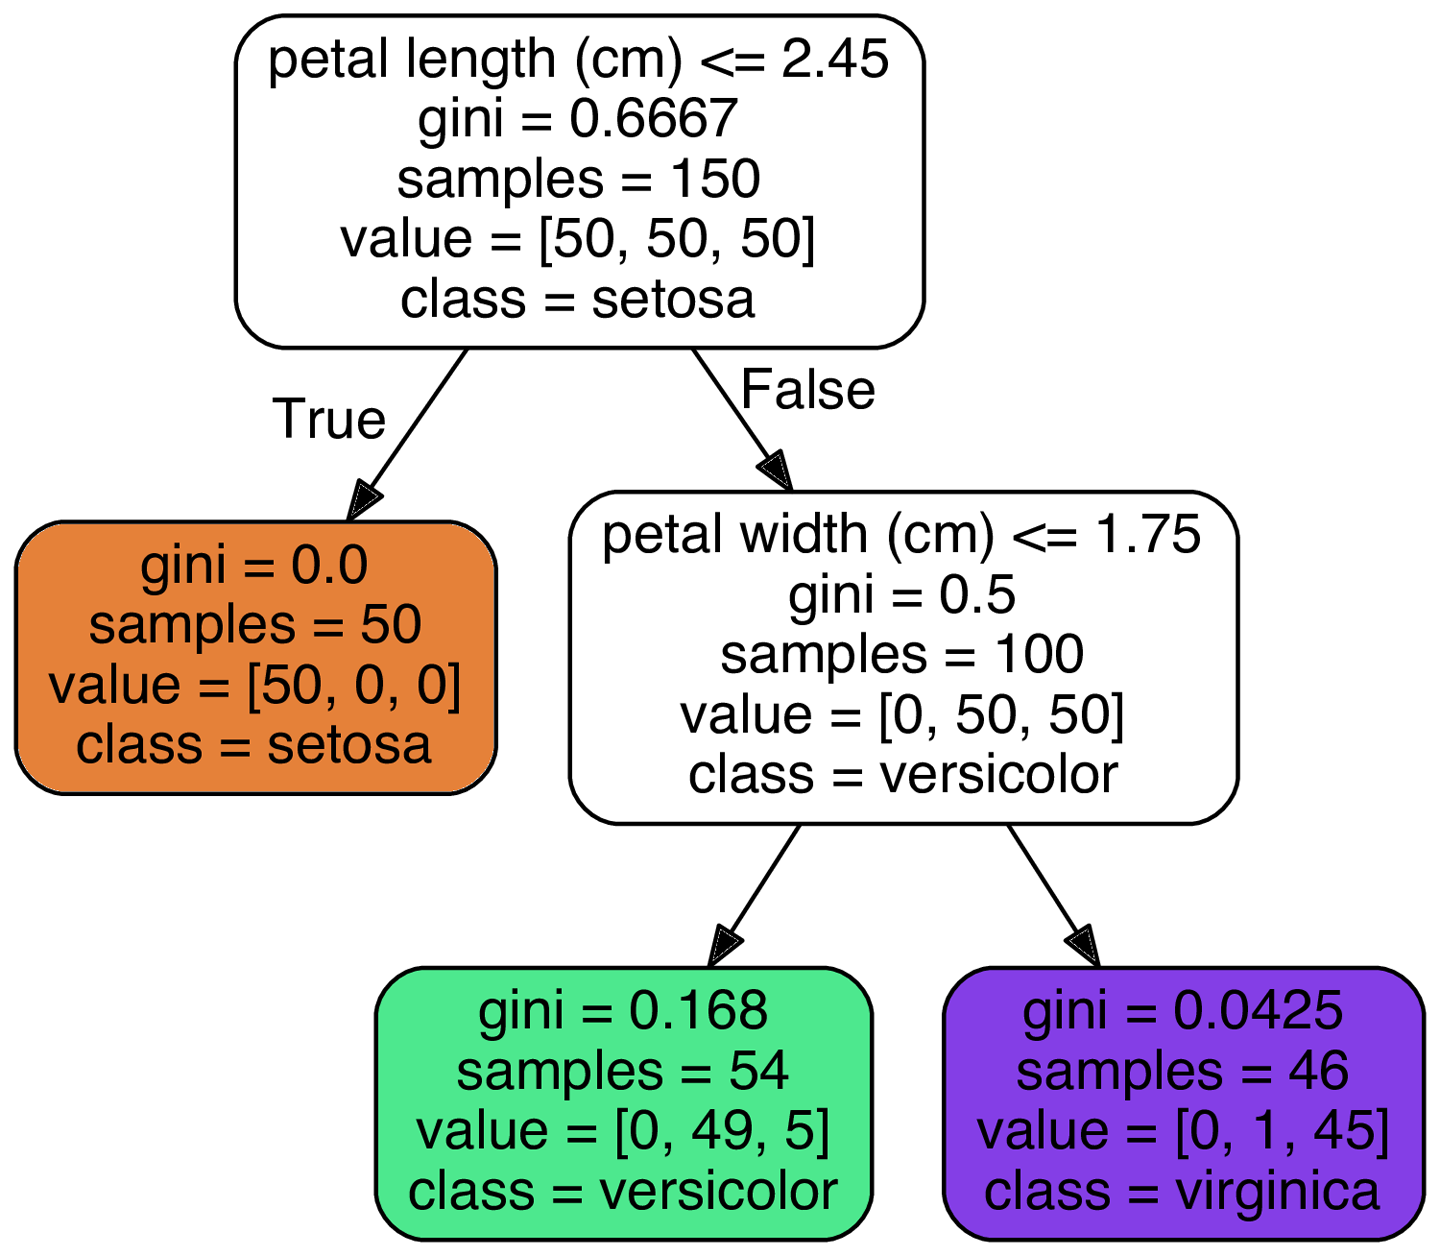

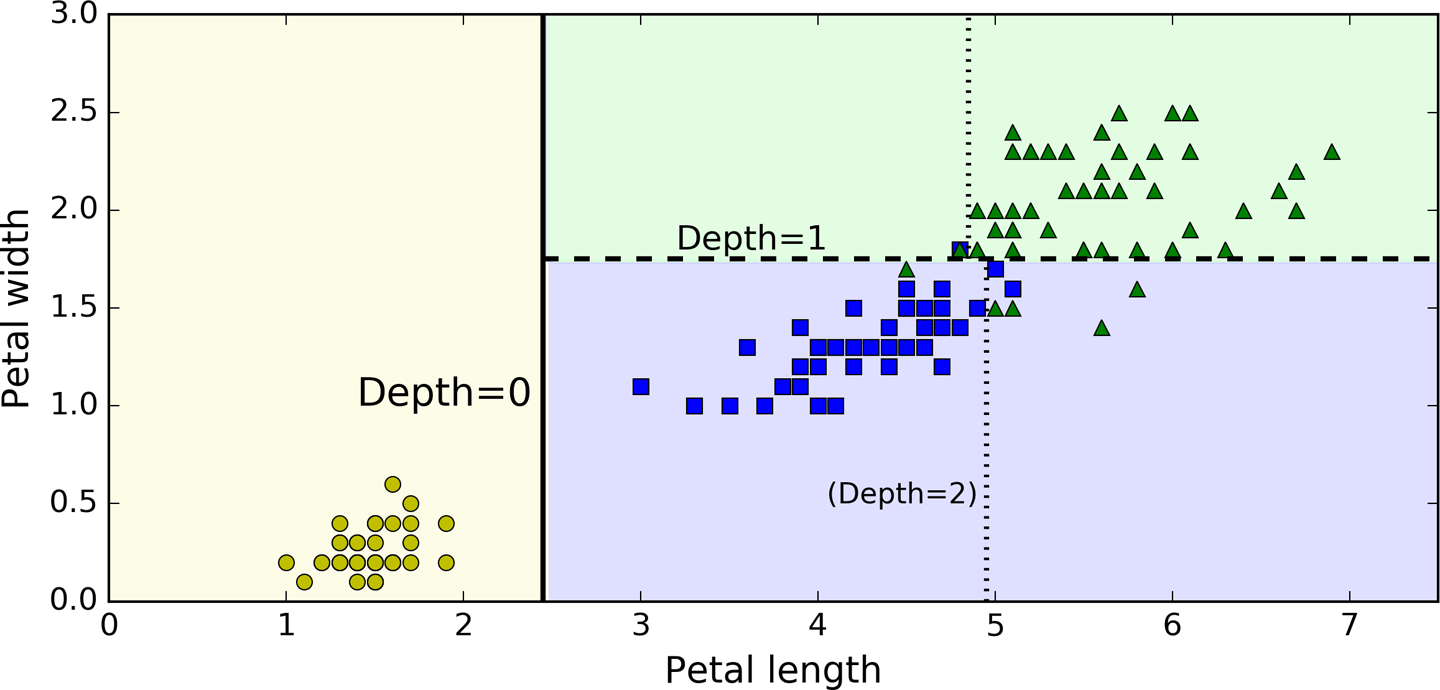

# <center>Процесс построения дерева решений</center>
## <center>CART (Classification and Regression Tree)</center>

Псевдокод:
```python
def build_decision_tree(X, y):
    node = Node()
    if stopping_criterion(X, y) is True:
        node = create_leaf_with_prediction(y)
        return node 
    else:
        X_left, y_left, X_rigth, y_rigth = best_split(X, y)
        node.left = build_decision_tree(X_left, y_left)
        node.right = build_decision_tree(X_rigth, y_rigth)
```

1. Создать новую вершину node.
2. Проверить некоторый критерий остановки `stop_criterion()`.
    1. Если условие остановки выполняется:
    Проверить, какой класс преобладает в текущей вершине. Превратить текущую вершину дерева в лист, где всем наблюдениям, которые попали в эту вершину, присвоить метку преобладающего класса.

        Прекратить построение дерева, вернув из алгоритма полученный лист.
    2. Если условие остановки не выполняется:
    Среди всех возможных предикатов $B_v(x,t) = I[x_j \leq t]$ найти такой, который обеспечивает разбиение выборки **наилучшим образом**.

        То есть нужно найти такой признак  и пороговое значение , при которых достигается максимум некоторой информативности (существуют разные меры информативности, о них поговорим ниже). Назовём эту часть алгоритма некоторой абстрактной функцией best_split().

>Вершина дерева `node` задаёт целое поддерево идущих за ним вершин, если такие имеются, а не только саму вершину.

# <center>Поиск параметров дерева решений</center>

В линейных моделях мы пытались найти такие коэффициенты в уравнениях, при которых наблюдался минимум функции потерь.

В деревьях же мы пытаемся выбрать такие признаки  и их пороговые значения , при которых произойдёт разделение набора на две части по какому-то критерию наилучшим образом. В нашем псевдокоде этот процесс организован в виде функции `best_split()`.

Неопределённость можно измерять различными способами, в деревьях решений для этого используются **энтропия Шеннона** и **критерий Джини**.

Пусть в вершину $B_v$ попало множество $X_v$ и $y_v$ объектов из обучающей выборки размером $n_v$, где $n$ — количество наблюдений, а $v$ — номер вершины.

Параметры в условии $x_j \leq t$ будут выбраны так, чтобы минимизировать некоторую функцию ошибки $L(j, t)$, зависящую от этих параметров:
$$L(j,t) \to \min_{j,t}$$
где $j$ — номер признака, а $t$ — пороговое значение.

Параметры $j$ и $t$ мы выбираем простым перебором всех возможных значений. Действительно, признаков — конечное число, а из всех возможных значений порога $t$ можно рассматривать только те, при которых получаются различные разбиения. 

После того как параметры были выбраны, множества $X_v$ объектов из обучающей выборки и ответов к ним $y_v$ разбиваются на два: $Q_{left} = (X_{left}, y_{left})$ и $Q_right = (X_{right}, y_{right})$, для которых условие $[x_j \leq t]$ выполняется и не выполняется соответственно.

Каждая из полученных выборок будет иметь свои размеры, назовём их $n_v^{left}$ и $n_v^{right}$. Тогда функция ошибки, численно выражающая неопределённость, будет состоять из двух слагаемых (неопределённость для левой и правой вершин) и определяться следующим образом:
$$ L(j,t) = \frac{n_v^{left}}{n_v}H(Q_{left})+\frac{n_v^{right}}{n_v}H(Q_{right}) $$

где $H(Q)$ — это функция, которая называется **критерием информативности**. Её значение уменьшается с уменьшением разброса ответов на выборке.
## Критерии информативности
### Энтропия Шеннона:
$$ H(Q) = -\sum^k_{i=1}P_ilog_2P_i $$
где $k$ — количество классов, $P_i$ — вероятность принадлежности объекта к классу $k$, $log_2$ — логарифм по основанию 2.

**Энтропия** — это очень важное понятие, используемое в физике, теории информации и других областях. Опуская предпосылки введения этого понятия, отметим, что интуитивно энтропия соответствует **степени хаоса в системе**. Чем выше энтропия, тем менее упорядочена система, и наоборот.
### Критерий Джини:
$$ H(Q) = \sum^k_{i=1}P_i(1-P_i) $$
где $k$ — количество классов, $P_i$ — вероятность принадлежности объекта к $i$-му классу.

Все слагаемые в сумме неотрицательные, поэтому критерий Джини также неотрицателен. Его минимум достигается только в том случае, когда все объекты в выборке относятся к одному классу.

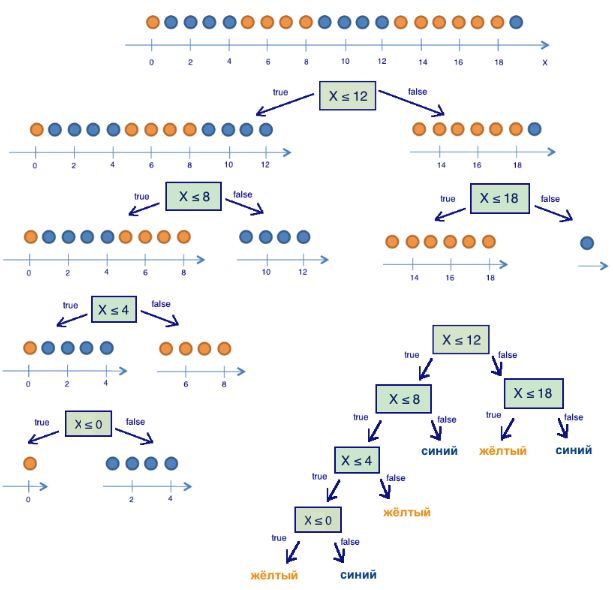

## Достониства деревьев решений
* Дерево решений не требует нормализации/стандартизации данных.
* Наличие пропусков не оказывает существенного влияния на построение дерева.
* За счёт своей простоты модель деревьев решений интуитивно понятна и легко объяснима даже людям, не разбирающимся в методе.
* Приятный побочный эффект построения дерева решений — получение значимости признаков. Однако коэффициенты значимости целиком и полностью зависят от сложности дерева.
## Недостатки деревьев решений
* В силу дискретной топологической структуры дерево не дифференцируется по параметрам: стандартные алгоритмы поиска параметров, такие как градиентный спуск, не работают. Приходится использовать полный перебор.
* Так как метод является жадным, он долго обучается из-за полного перебора. Требует затрат больших вычислительных мощностей (по сравнению с другими алгоритмами). Особенно это ощутимо при большом количестве признаков на глубоких деревьях.
* Очень сильная склонность к переобучению. Необходим подбор внешних параметров: max_depth, min_sample_leaf и другие (о том, как организовать этот подбор, мы поговорим в отдельном модуле).
* Небольшое изменение в данных может заметно повлиять на структуру дерева.
* При работе с непрерывными числовыми признаками дерево делит их на категории и теряет информацию. Лучше всего дерево работает, если перевести числовые признаки в категориальные.
